# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from river import metrics, evaluate, stream, compose, drift, preprocessing, neighbors,utils 

from collections import defaultdict, Counter

from AdaptiveSAM import AdaptiveSAMKNNClassifier
from SAMKNN import SAMKNNClassifier

import time
from memory_profiler import memory_usage
import psutil
import tracemalloc
import logging

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from tqdm import tqdm 

%matplotlib inline

# Experiment 1

### Baseline comparison of Adaptive SAMKNN and SAMKNN - Binary 

In [2]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Define the dataset iterator
def get_dataset():
    return stream.iter_pandas(X, y)

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Define the pipeline for SAMKNN
pipeline_samknn = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True
    ))
)

# Initialize separate classification reports for each classifier
report_adaptive = metrics.ClassificationReport()
report_samknn = metrics.ClassificationReport()

# Function to evaluate a model
def evaluate_model(pipeline, report, model_name):
    print(f"Evaluating {model_name}...")
    dataset = get_dataset()  # Reset the dataset iterator
    evaluate.progressive_val_score(
        dataset=dataset,
        model=pipeline,
        metric=report,
        print_every=50000,
        show_time=True,
        show_memory=True
    )
    print(f"Finished evaluating {model_name}.\n")

# Evaluate Adaptive SAMKNN
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN")

# Evaluate SAMKNN
evaluate_model(pipeline_samknn, report_samknn, "SAMKNN")

# Display the classification reports
print("Adaptive SAMKNN Classification Report:")
print(report_adaptive)

print("\nSAMKNN Classification Report:")
print(report_samknn)

Evaluating Adaptive SAMKNN...
[50,000]            Precision   Recall   F1       Support  
                                                  
       0      71.47%   23.74%   35.64%      1108  
       1      98.30%   99.79%   99.04%     48891  
                                                  
   Macro      84.88%   61.76%   67.34%            
   Micro      98.10%   98.10%   98.10%            
Weighted      97.70%   98.10%   97.63%            

                 98.10% accuracy                   – 00:00:08 – 63.03 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      73.31%   27.45%   39.95%      2251  
       1      98.35%   99.77%   99.06%     97748  
                                                  
   Macro      85.83%   63.61%   69.50%            
   Micro      98.14%   98.14%   98.14%            
Weighted      97.79%   98.14%   97.73%            

                 98.14% accuracy                   – 00:00:1

### Baseline comparison of Adaptive SAMKNN and SAMKNN - Multiclass

In [3]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Attack']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Define the dataset iterator
def get_dataset():
    return stream.iter_pandas(X, y)

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Define the pipeline for SAMKNN
pipeline_samknn = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True
    ))
)

# Initialize separate classification reports for each classifier
report_adaptive = metrics.ClassificationReport()
report_samknn = metrics.ClassificationReport()

# Function to evaluate a model
def evaluate_model(pipeline, report, model_name):
    print(f"Evaluating {model_name}...")
    dataset = get_dataset()  # Reset the dataset iterator
    evaluate.progressive_val_score(
        dataset=dataset,
        model=pipeline,
        metric=report,
        print_every=50000,
        show_time=True,
        show_memory=True
    )
    print(f"Finished evaluating {model_name}.\n")

# Evaluate Adaptive SAMKNN
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN")

# Evaluate SAMKNN
evaluate_model(pipeline_samknn, report_samknn, "SAMKNN")

# Display the classification reports
print("Adaptive SAMKNN Classification Report:")
print(report_adaptive)

print("\nSAMKNN Classification Report:")
print(report_samknn)

Evaluating Adaptive SAMKNN...
[50,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      69.44%   24.82%   36.57%      1108  
          DDoS      36.14%   38.95%   37.49%      4726  
           DoS      37.31%   40.00%   38.61%      4780  
Reconnaissance      92.77%   93.04%   92.90%     39244  
         Theft      29.17%    4.96%    8.48%       141  
                                                        
         Macro      52.97%   40.36%   42.81%            
         Micro      81.10%   81.10%   81.10%            
      Weighted      81.42%   81.10%   80.99%            

                    81.10% accuracy                      – 00:00:08 – 63.38 KB
[100,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      71.57%   28.52%   40.79%      2251  
          DDoS      36.48%   39.33%   37.85%      9498  
           DoS  

### Baseline comparison of the offline models - Binary

In [4]:
# Load the dataset
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Select features by dropping irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']  # Target variable

# Shuffle the dataset to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Split the data into training and testing sets
# Using stratification to maintain class distribution
X_train_offline, X_test_offline, y_train_offline, y_test_offline = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize features for offline models
scaler_offline = StandardScaler()
X_train_offline = scaler_offline.fit_transform(X_train_offline)
X_test_offline = scaler_offline.transform(X_test_offline)

# 3. Setting Up Offline Learning Models (Scikit-learn)
# -----------------------------------------------------

# Initialize various offline classifiers with appropriate hyperparameters
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Organize classifiers into a dictionary for easy iteration
offline_classifiers = {
    'Random Forest': rf_clf,
    'K-Nearest Neighbors': knn_clf,
    'Support Vector Machine': svm_clf,
    'Decision Tree': dt_clf,
    'Logistic Regression': lr_clf
}

# 4. Evaluating Offline Models with Time and Memory Profiling
# ------------------------------------------------------------

# Initialize a dictionary to store evaluation results
offline_results = {}

# Iterate over each offline classifier to train and evaluate
for name, clf in offline_classifiers.items():
    print(f"Evaluating {name}...")
    
    # -----------------------------
    # 4.1 Training Phase
    # -----------------------------
    
    # Define a function for training to use with memory_usage
    def train_model():
        clf.fit(X_train_offline, y_train_offline)
    
    # Start tracking time
    start_time_train = time.time()
    
    # Measure peak memory usage during training
    mem_train = memory_usage((train_model, ), max_usage=True, interval=0.1, timeout=None)
    
    # Stop tracking time
    end_time_train = time.time()
    
    # Calculate training time and memory usage
    train_time = end_time_train - start_time_train  # In seconds
    train_memory = mem_train  # In MB (memory_usage returns in MB by default)
    
    # -----------------------------
    # 4.2 Prediction Phase
    # -----------------------------
    
    # Define a function for prediction to use with memory_usage
    def predict_model():
        return clf.predict(X_test_offline)
    
    # Start tracking time
    start_time_pred = time.time()
    
    # Measure peak memory usage during prediction
    mem_pred, y_pred = memory_usage((predict_model, ), max_usage=True, retval=True, interval=0.1, timeout=None)
    
    # Stop tracking time
    end_time_pred = time.time()
    
    # Calculate prediction time and memory usage
    pred_time = end_time_pred - start_time_pred  # In seconds
    pred_memory = mem_pred  # In MB
    
    # -----------------------------
    # 4.3 Calculate Evaluation Metrics
    # -----------------------------
    
    # Compute various performance metrics
    acc = accuracy_score(y_test_offline, y_pred)
    prec = precision_score(y_test_offline, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_offline, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_offline, y_pred, average='weighted', zero_division=0)
    
    # Store the results in the dictionary
    offline_results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Training Time (s)': train_time,
        'Prediction Time (s)': pred_time,
        'Training Memory (MB)': train_memory,
        'Prediction Memory (MB)': pred_memory
    }
    
    # Display a classification report for detailed insights
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test_offline, y_pred, zero_division=0))
    
    print(f"{name} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    print(f"Training Time: {train_time:.2f} seconds, Training Memory Usage: {train_memory:.2f} MB")
    print(f"Prediction Time: {pred_time:.2f} seconds, Prediction Memory Usage: {pred_memory:.2f} MB\n")
    
# 5. Combining and Displaying Results
# ------------------------------------

# Convert the offline_results dictionary to a DataFrame for better visualization
offline_df = pd.DataFrame(offline_results).T  # Transpose for better readability

# Display the combined results
print("===== Offline ML Models Evaluation Results =====\n")
print(offline_df)

Evaluating Random Forest...
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      4158
           1       0.99      0.99      0.99    175872

    accuracy                           0.99    180030
   macro avg       0.89      0.87      0.88    180030
weighted avg       0.99      0.99      0.99    180030

Random Forest - Accuracy: 0.9893, Precision: 0.9891, Recall: 0.9893, F1-Score: 0.9892
Training Time: 14.24 seconds, Training Memory Usage: 718.14 MB
Prediction Time: 0.74 seconds, Prediction Memory Usage: 718.27 MB

Evaluating K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      4158
           1       0.99      1.00      1.00    175872

    accuracy                           0.99    180030
   macro avg       0.93      0.86      0.89    180030
weighted avg       0.99      0.99

# Experiment 2 - Simulating zero day attack

### Simulating zero day attack on the regular BoT dataset

Accuracy: 0.9964
Precision: 0.9963
Recall: 1.0000
F1 Score: 0.9982
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.1496
Average Detection Latency: 0.0001 seconds
Confusion Matrix for Known Attacks:
    0       1        
0   3,626       638  
1       0   175,161  
Confusion Matrix for Zero-Day Attacks:
    1    
1   605  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9962
Precision: 0.9961
Recall: 1.0000
F1 Score: 0.9981


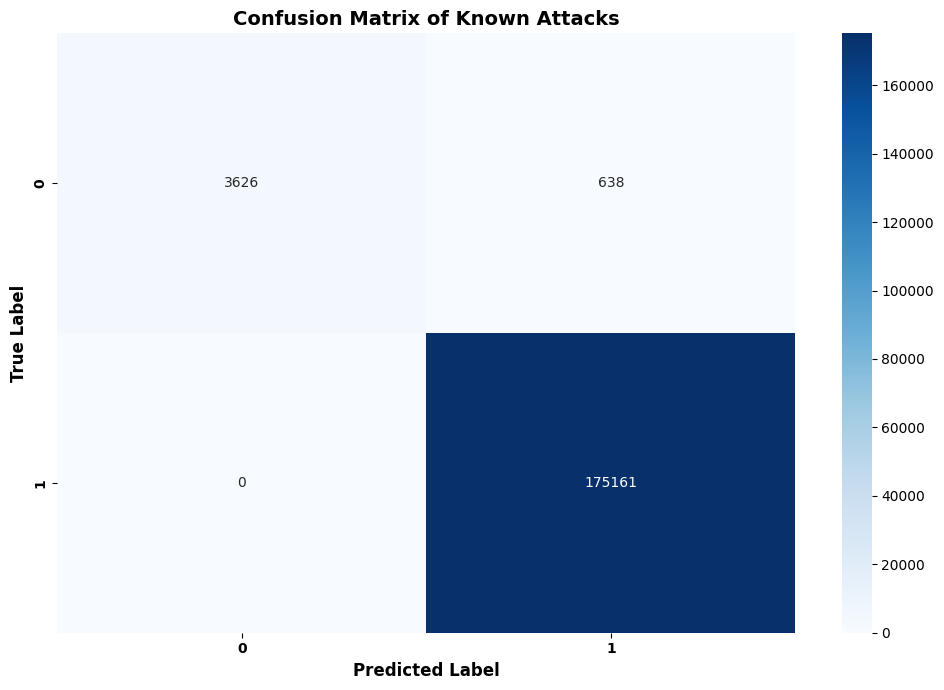

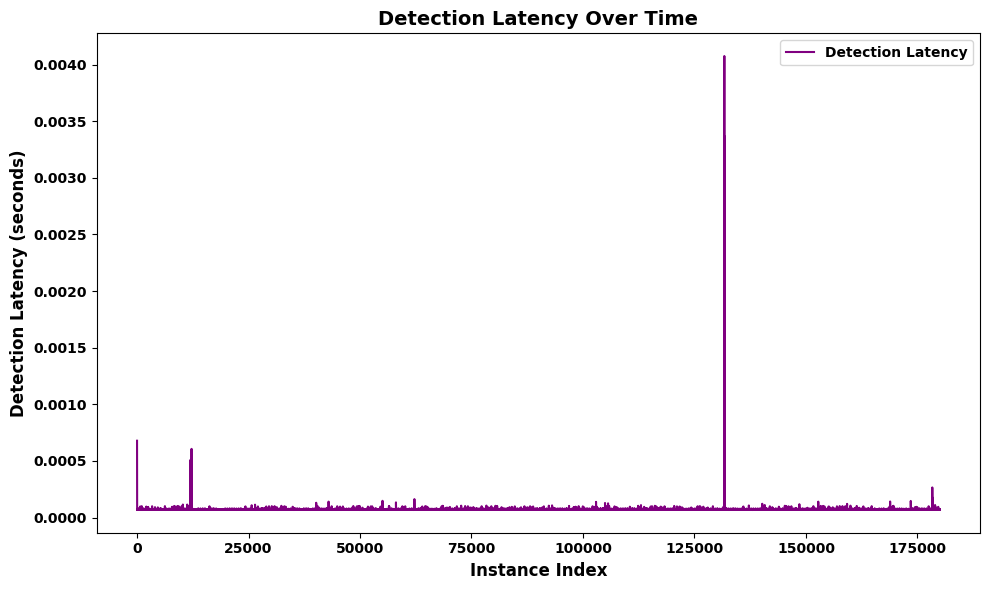

In [6]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'Theft']  
testing_df_zero_day = testing_df[testing_df['Attack'] == 'Theft']  
testing_df_known = testing_df[testing_df['Attack'] != 'Theft']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'Theft':  # Check if true label is Theft (zero-day)
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

folder_path = '/Users/promisea/SAMKNN/Plots'

# Save the detection latency plot
latency_file_name = 'Detection_Theft_BoT.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.1356
Average Detection Latency: 0.0001 seconds
Confusion Matrix for Known Attacks:
    0       1        
0   3,686       578  
1       2   158,797  
Confusion Matrix for Zero-Day Attacks:
    1       
1   16,967  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9970
Precision: 0.9969
Recall: 1.0000
F1 Score: 0.9985


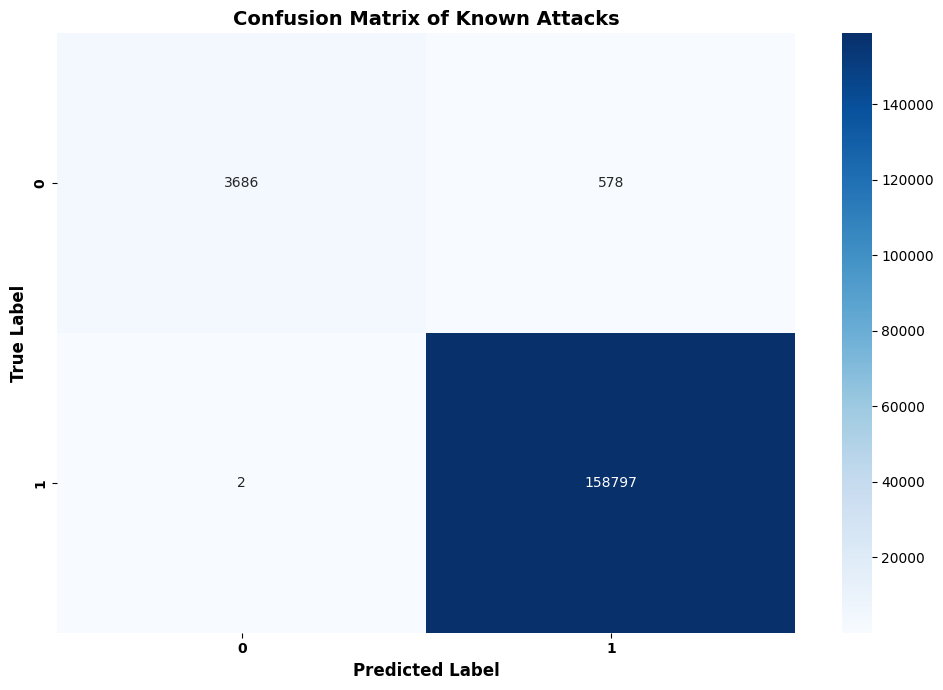

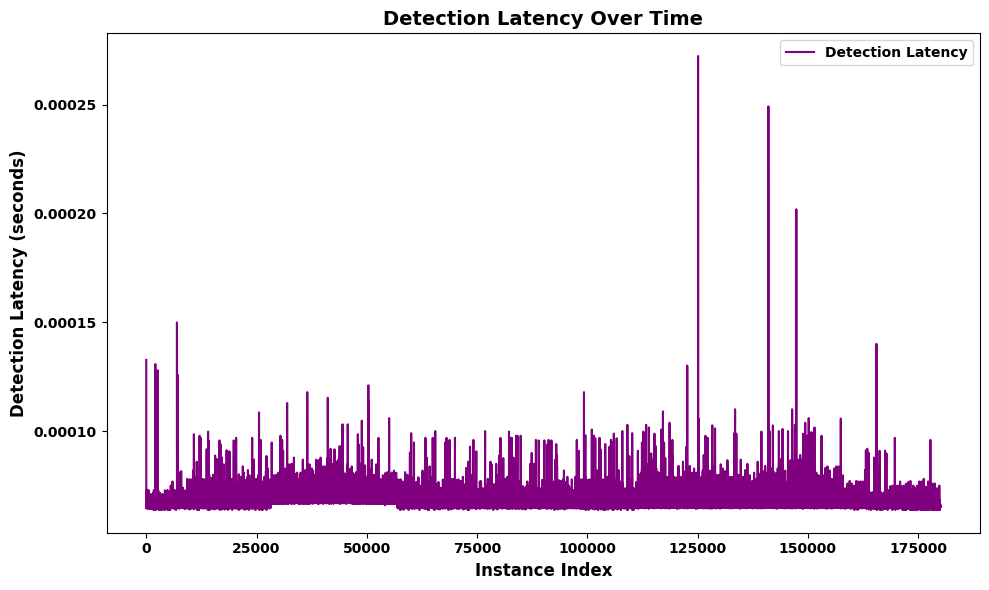

In [7]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'DDoS']  
testing_df_zero_day = testing_df[testing_df['Attack'] == 'DDoS']  
testing_df_known = testing_df[testing_df['Attack'] != 'DDoS']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'DDoS':  # Check if true label is Theft (zero-day)
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Save the detection latency plot
latency_file_name = 'Detection_DDoS_BoT.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.0385
Average Detection Latency: 0.0001 seconds
Confusion Matrix for Known Attacks:
    0       1       
0   4,100      164  
1      32   34,789  
Confusion Matrix for Zero-Day Attacks:
    0   1        
0   0         0  
1   3   140,942  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9946
Precision: 0.9944
Recall: 0.9996
F1 Score: 0.9970


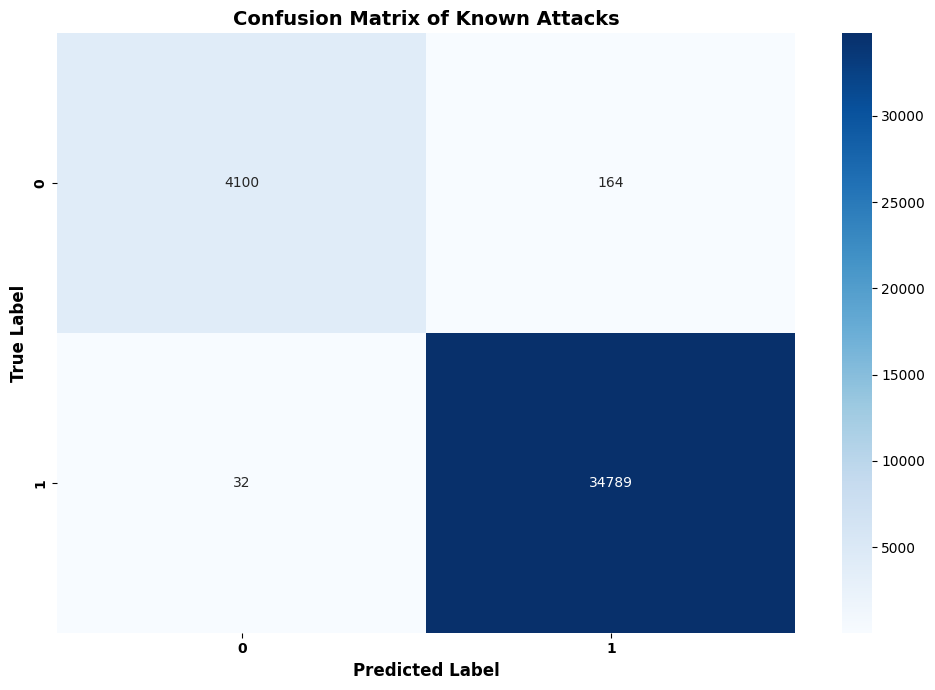

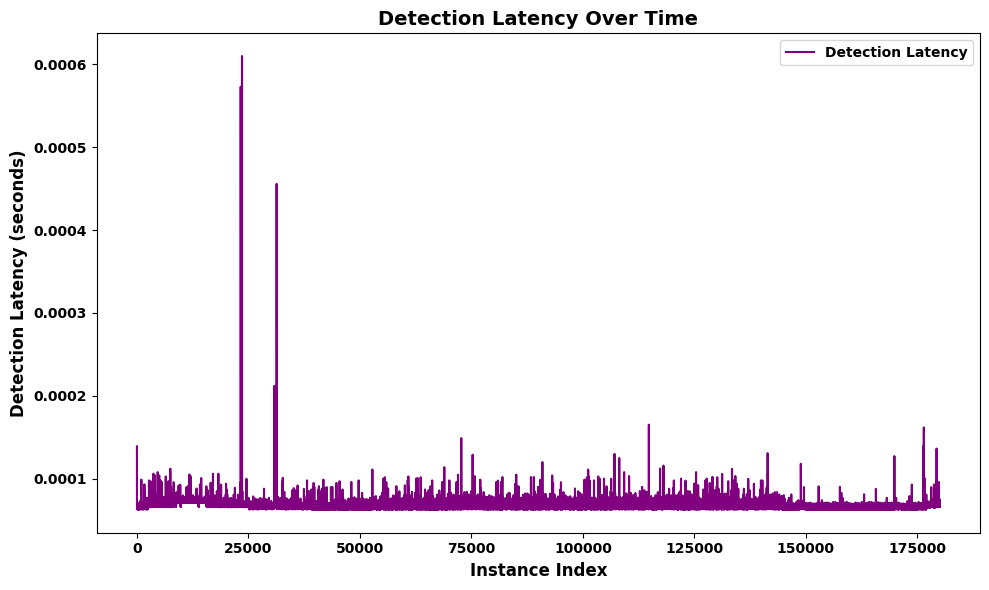

In [8]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'Reconnaissance']  # Remove "Theft" attacks from training data
testing_df_zero_day = testing_df[testing_df['Attack'] == 'Reconnaissance']  # Keep "Theft" attacks as zero-day instances
testing_df_known = testing_df[testing_df['Attack'] != 'Reconnaissance']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'Reconnaissance':  # Check if true label is Theft (zero-day)
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Save the detection latency plot
latency_file_name = 'Detection_Reconnaisance_BoT.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()

### Simulating zero day attack on the BoT dataset containing synthetic zero-day attack

Accuracy: 0.9986
Precision: 0.9986
Recall: 1.0000
F1 Score: 0.9993
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.1678
Average Detection Latency: 0.0001 seconds
Confusion Matrix for Known Attacks:
    0       1        
0   3,447       695  
1       0   187,666  
Confusion Matrix for Zero-Day Attacks:
    1      
1   3,222  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9948
Precision: 0.9947
Recall: 1.0000
F1 Score: 0.9974


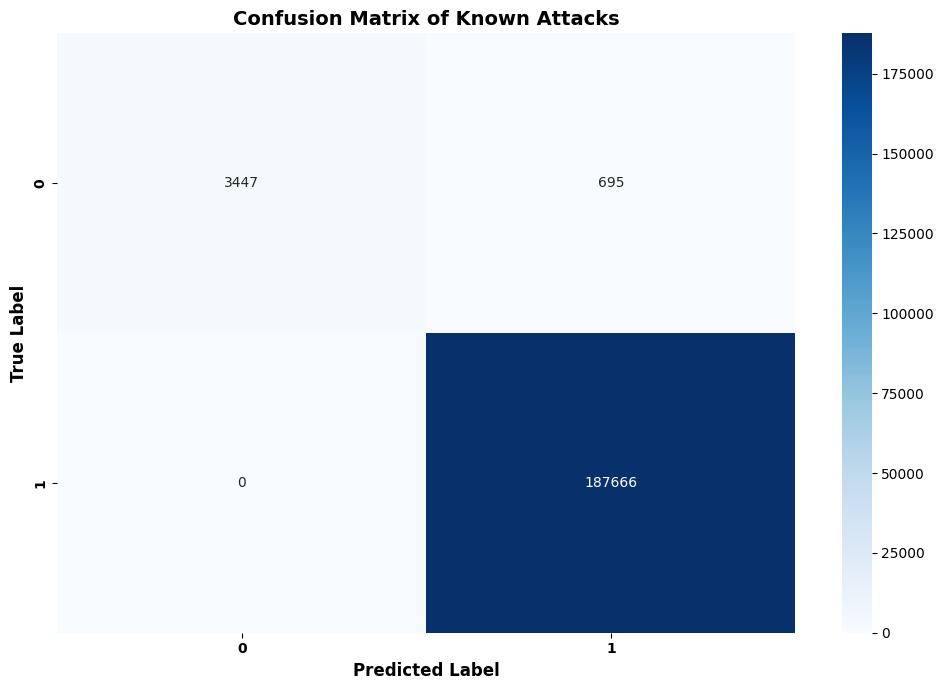

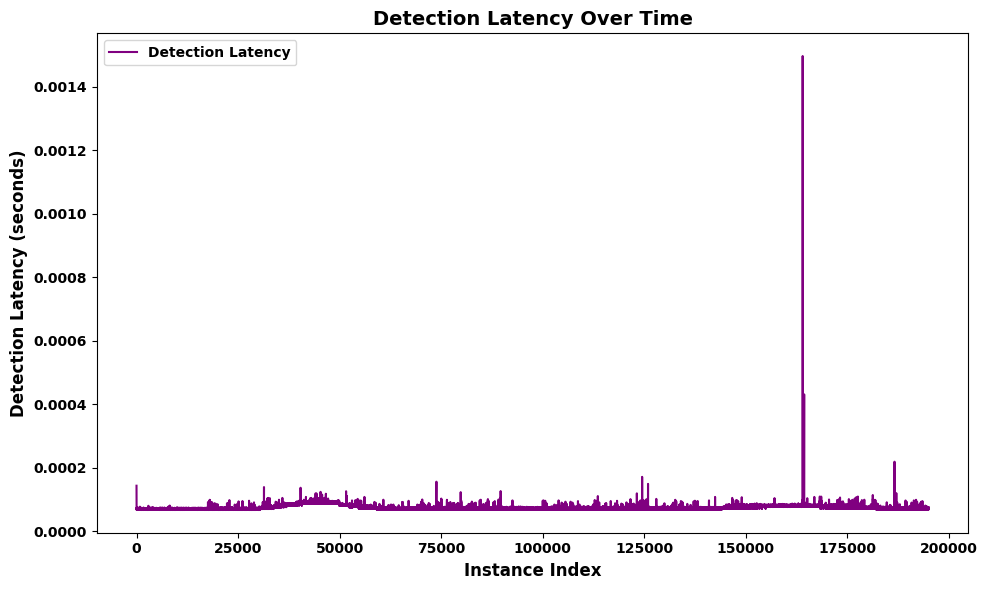

In [9]:
# Load and preprocess the data
data = pd.read_csv("Augmented_NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'Theft']  # Remove "Theft" attacks from training data
testing_df_zero_day = testing_df[testing_df['Attack'] == 'Theft']  # Keep "Theft" attacks as zero-day instances
testing_df_known = testing_df[testing_df['Attack'] != 'Theft']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'Theft':  # Check if true label is Theft (zero-day)
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Save the detection latency plot
latency_file_name = 'Detection_Theft_CTAN.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.1487
Average Detection Latency: 0.0006 seconds
Confusion Matrix for Known Attacks:
    0       1        
0   3,526       616  
1       0   170,158  
Confusion Matrix for Zero-Day Attacks:
    1       
1   20,730  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9950
Precision: 0.9949
Recall: 1.0000
F1 Score: 0.9975


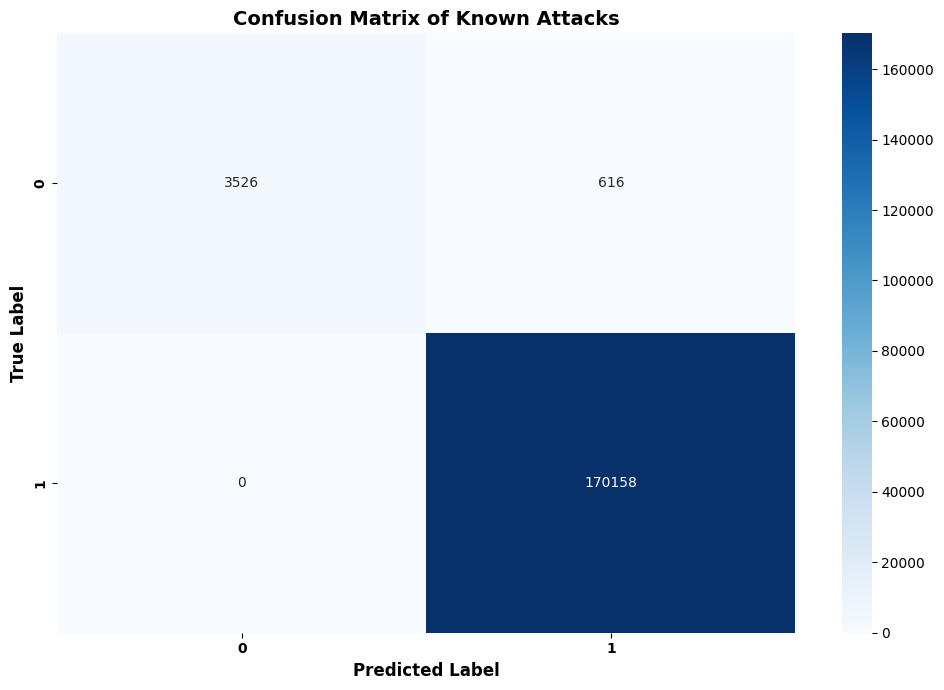

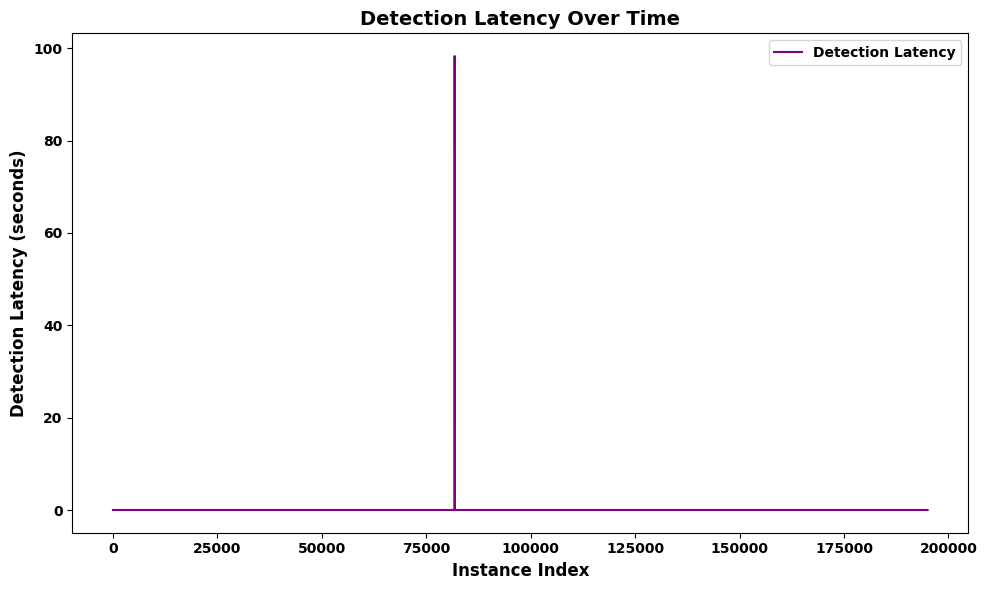

In [10]:
# Load and preprocess the data
data = pd.read_csv("Augmented_NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'DDoS']  
testing_df_zero_day = testing_df[testing_df['Attack'] == 'DDoS'] 
testing_df_known = testing_df[testing_df['Attack'] != 'DDoS']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'DDoS':  
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Save the detection latency plot
latency_file_name = 'Detection_DDoS_CTAN.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Detection Rate for Zero-Day Attacks: 1.0000
False Positive Rate: 0.0671
Average Detection Latency: 0.0001 seconds
Confusion Matrix for Known Attacks:
    0       1       
0   3,864      278  
1      58   44,924  
Confusion Matrix for Zero-Day Attacks:
    0   1        
0   0         0  
1   6   145,900  
Zero-Day Attack Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Known Attack Metrics:
Accuracy: 0.9916
Precision: 0.9924
Recall: 0.9985
F1 Score: 0.9954


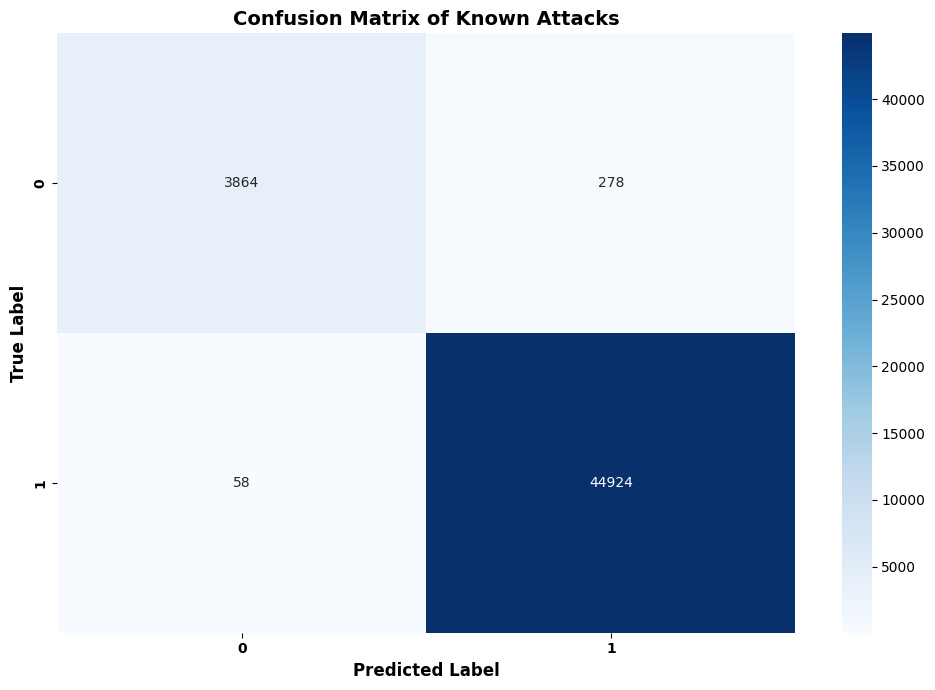

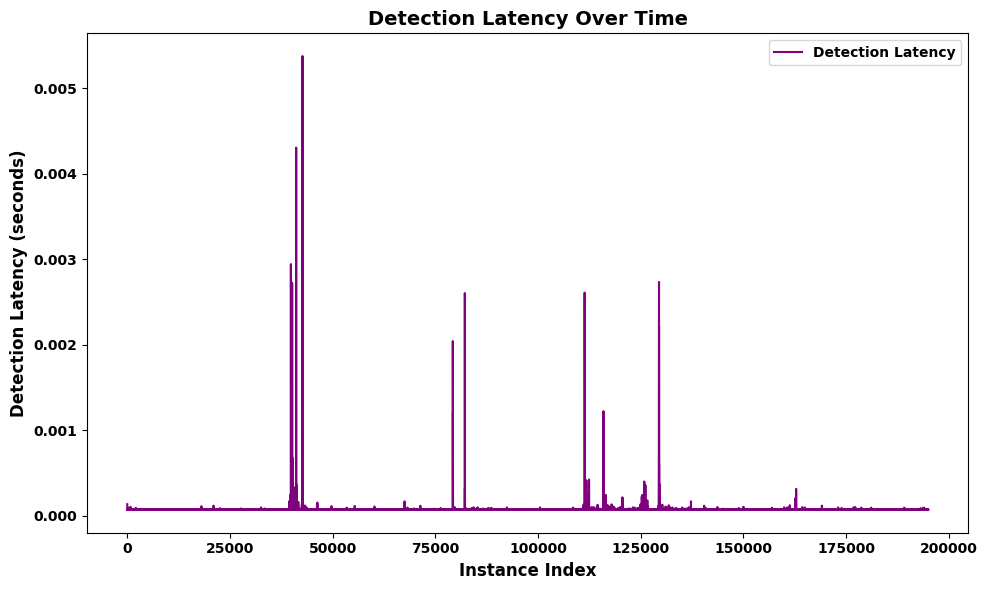

In [11]:
# Load and preprocess the data
data = pd.read_csv("Augmented_NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Combine features and labels back into a DataFrame for streaming
stream_data = pd.concat([X, y], axis=1)

# Split the data into training and testing parts
train_size = int(0.7 * len(stream_data))
training_df = stream_data[:train_size]
testing_df = stream_data[train_size:]

# Simulate zero-day attacks by introducing new attack instances in the testing data
# In this case, we'll treat "Theft" as our zero-day attack
training_df = training_df[training_df['Attack'] != 'Reconnaissance']  
testing_df_zero_day = testing_df[testing_df['Attack'] == 'Reconnaissance']  
testing_df_known = testing_df[testing_df['Attack'] != 'Reconnaissance']

# Combine known and zero-day testing data
testing_df = pd.concat([testing_df_known, testing_df_zero_day])

# Initialize the training and testing streams
training_stream = stream.iter_pandas(training_df.drop(['Attack'], axis=1), training_df['Label'])
testing_stream = stream.iter_pandas(testing_df.drop(['Attack'], axis=1), testing_df['Label'])

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
accuracy = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision = utils.Rolling(metrics.Precision(), window_size=5000)
recall = utils.Rolling(metrics.Recall(), window_size=5000)
f1 = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_zero_day = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_zero_day = utils.Rolling(metrics.Precision(), window_size=5000)
recall_zero_day = utils.Rolling(metrics.Recall(), window_size=5000)
f1_zero_day = utils.Rolling(metrics.F1(), window_size=5000)
accuracy_known = utils.Rolling(metrics.Accuracy(), window_size=5000)
precision_known = utils.Rolling(metrics.Precision(), window_size=5000)
recall_known = utils.Rolling(metrics.Recall(), window_size=5000)
f1_known = utils.Rolling(metrics.F1(), window_size=5000)
conf_matrix_known = metrics.ConfusionMatrix()
conf_matrix_zero_day = metrics.ConfusionMatrix()

detection_rate = 0
false_positive_rate = 0
latency_list = []
zero_day_count = 0
benign_count = 0
false_positive_count = 0

# Train the classifier on the training stream
for x, y in training_stream:
    pipeline_adaptive.learn_one(x, y)

# Evaluate the classifier on the testing stream (including zero-day attacks)
for idx, (x, y) in enumerate(testing_stream):
    start_time = time.time()
    y_pred = pipeline_adaptive.predict_one(x)
    detection_time = time.time() - start_time

    if y_pred is not None:
        # Update metrics
        accuracy.update(y, y_pred)
        precision.update(y, y_pred)
        recall.update(y, y_pred)
        f1.update(y, y_pred)
        latency_list.append(detection_time)

        if testing_df.iloc[idx]['Attack'] == 'Reconnaissance':  # Check if true label is Theft (zero-day)
            zero_day_count += 1
            if y == y_pred:
                detection_rate += 1
            conf_matrix_zero_day.update(y, y_pred)
            accuracy_zero_day.update(y, y_pred)
            precision_zero_day.update(y, y_pred)
            recall_zero_day.update(y, y_pred)
            f1_zero_day.update(y, y_pred)
        else:
            conf_matrix_known.update(y, y_pred)
            accuracy_known.update(y, y_pred)
            precision_known.update(y, y_pred)
            recall_known.update(y, y_pred)
            f1_known.update(y, y_pred)
            if y == 0 and y_pred == 1:
                false_positive_count += 1
                benign_count += 1
            elif y == 0:
                benign_count += 1

    # Continue learning in an online manner
    pipeline_adaptive.learn_one(x, y)

# Calculate additional metrics
if zero_day_count > 0:
    detection_rate /= zero_day_count
if benign_count > 0:
    false_positive_rate = false_positive_count / benign_count
latency = np.mean(latency_list) if latency_list else 0

# Print final evaluation results
print(f"Accuracy: {accuracy.get():.4f}")
print(f"Precision: {precision.get():.4f}")
print(f"Recall: {recall.get():.4f}")
print(f"F1 Score: {f1.get():.4f}")
print(f"Detection Rate for Zero-Day Attacks: {detection_rate:.4f}")
print(f"False Positive Rate: {false_positive_rate:.4f}")
print(f"Average Detection Latency: {latency:.4f} seconds")
print(f"Confusion Matrix for Known Attacks:\n{conf_matrix_known}")
print(f"Confusion Matrix for Zero-Day Attacks:\n{conf_matrix_zero_day}")

print(f"Zero-Day Attack Metrics:")
print(f"Accuracy: {accuracy_zero_day.get():.4f}")
print(f"Precision: {precision_zero_day.get():.4f}")
print(f"Recall: {recall_zero_day.get():.4f}")
print(f"F1 Score: {f1_zero_day.get():.4f}")

print(f"Known Attack Metrics:")
print(f"Accuracy: {accuracy_known.get():.4f}")
print(f"Precision: {precision_known.get():.4f}")
print(f"Recall: {recall_known.get():.4f}")
print(f"F1 Score: {f1_known.get():.4f}")


# ---------------------------
# Visualization of the Confusion Matrices
# ---------------------------

# Known Attacks Confusion Matrix
conf_matrix_known_data = np.array([
    [conf_matrix_known[true][pred] for pred in conf_matrix_known.classes]
    for true in conf_matrix_known.classes
])

plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_known_data, 
    annot=True, 
    cmap='Blues', 
    fmt='g', 
    xticklabels=conf_matrix_known.classes, 
    yticklabels=conf_matrix_known.classes
)

# Set title with bold font
plt.title('Confusion Matrix of Known Attacks', fontweight='bold', fontsize=14)

# Set labels with bold font
plt.xlabel('Predicted Label', fontweight='bold', fontsize=12)
plt.ylabel('True Label', fontweight='bold', fontsize=12)

# Customize tick parameters to make them bold
ax_cm = plt.gca()
for tick in ax_cm.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_cm.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
plt.show()

# ---------------------------
# Learning Curves - Detection Latency
# ---------------------------

plt.figure(figsize=(10, 6))
plt.plot(latency_list, color='purple', label='Detection Latency')

# Set labels with bold font
plt.xlabel('Instance Index', fontweight='bold', fontsize=12)
plt.ylabel('Detection Latency (seconds)', fontweight='bold', fontsize=12)

# Set title with bold font
plt.title('Detection Latency Over Time', fontweight='bold', fontsize=14)

# Customize tick parameters to make them bold
ax_latency = plt.gca()
for tick in ax_latency.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax_latency.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Save the detection latency plot
latency_file_name = 'Detection_Reconnaisance_CTAN.png'
latency_file_path = os.path.join(folder_path, latency_file_name)
plt.tight_layout()
plt.savefig(latency_file_path)
plt.show()


# Experiment 3 - Scalability

### Implementation of scalability 

After 50000 instances:
Time elapsed: 24.25 seconds
CPU usage: 12.40%
Memory usage: 45.84 MB
Accuracy: 0.9810
Precision: 0.9830
Recall: 0.9978
F1 Score: 0.9903
--------------------------------------------------
After 100000 instances:
Time elapsed: 48.64 seconds
CPU usage: 12.43%
Memory usage: 45.85 MB
Accuracy: 0.9818
Precision: 0.9841
Recall: 0.9975
F1 Score: 0.9908
--------------------------------------------------
After 150000 instances:
Time elapsed: 73.01 seconds
CPU usage: 12.47%
Memory usage: 45.85 MB
Accuracy: 0.9818
Precision: 0.9837
Recall: 0.9979
F1 Score: 0.9908
--------------------------------------------------
After 200000 instances:
Time elapsed: 97.41 seconds
CPU usage: 12.44%
Memory usage: 45.85 MB
Accuracy: 0.9804
Precision: 0.9829
Recall: 0.9973
F1 Score: 0.9900
--------------------------------------------------
After 250000 instances:
Time elapsed: 122.17 seconds
CPU usage: 12.37%
Memory usage: 45.85 MB
Accuracy: 0.9801
Precision: 0.9830
Recall: 0.9968
F1 Score: 0.9

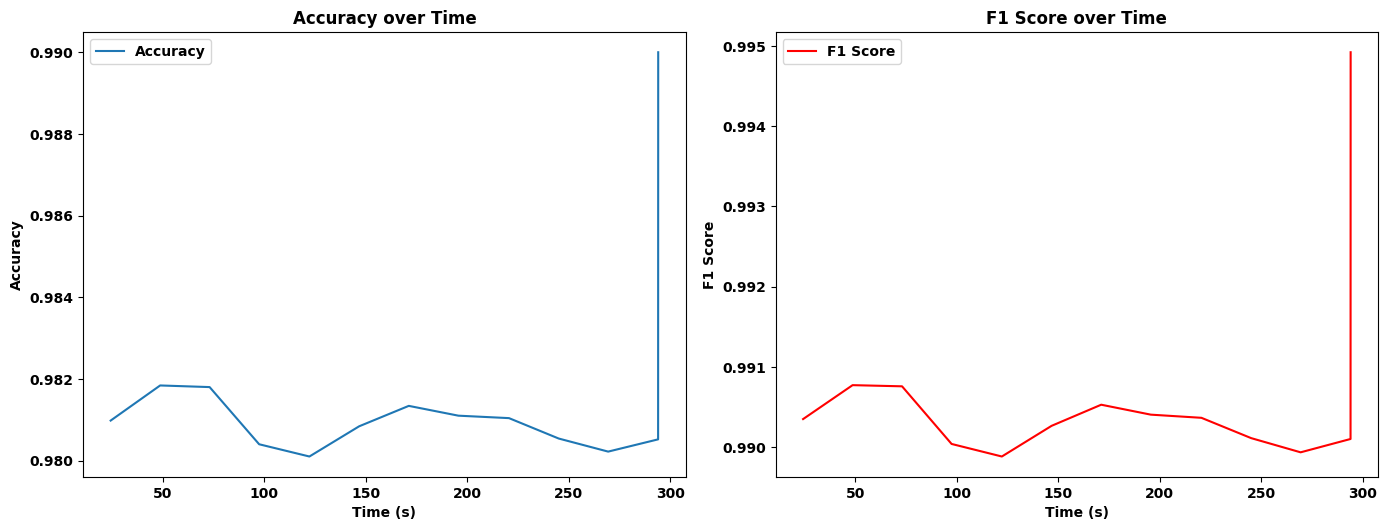

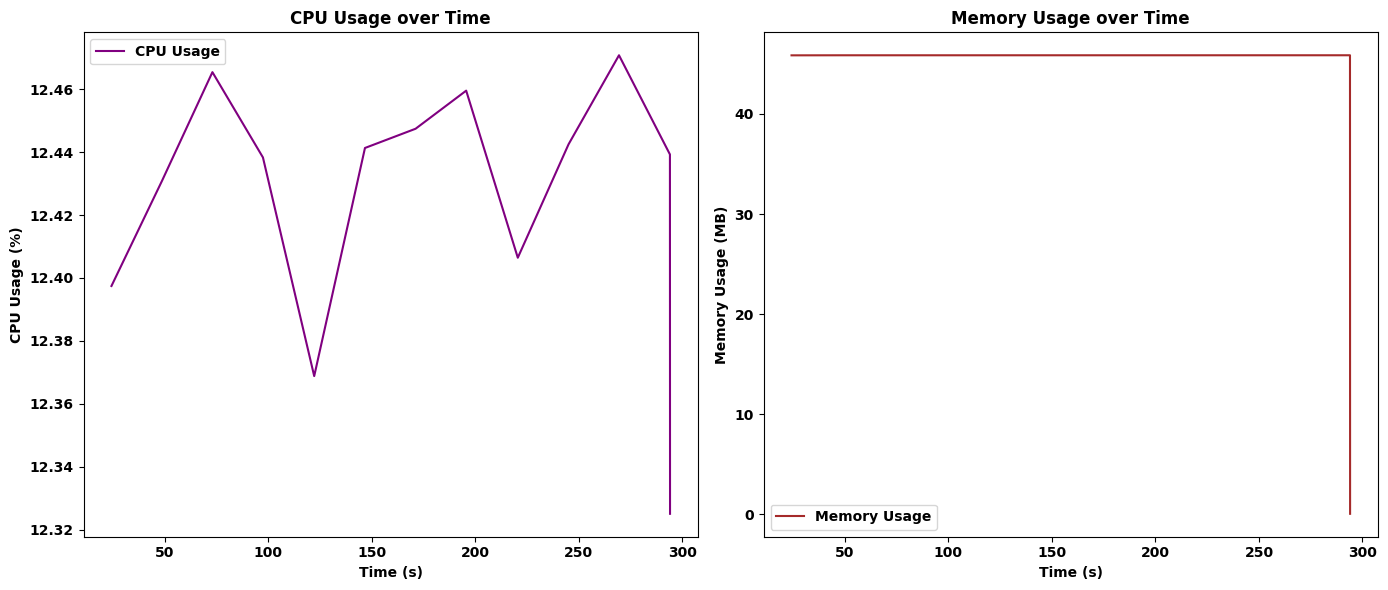

In [38]:
# Function to initialize metric instances
def get_metrics():
    return [
        metrics.Accuracy(),
        metrics.Precision(),
        metrics.Recall(),
        metrics.F1()
    ]

# Load and preprocess the data
try:
    data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
except FileNotFoundError:
    print("Error: CSV file not found.")
    exit(1)
except pd.errors.EmptyDataError:
    print("Error: CSV file is empty.")
    exit(1)
# Add more exception handling as needed

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']
X, y = shuffle(X, y, random_state=42)

# Define the dataset iterator
def get_dataset(X, y):
    return stream.iter_pandas(X, y)

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize metrics
metrics_list = get_metrics()

# Initialize performance tracking lists
times = []
cpu_usages = []
memory_usages = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Initialize CPU monitoring
process = psutil.Process()

# Get the number of logical CPUs
num_cpus = psutil.cpu_count(logical=True)
if num_cpus is None:
    num_cpus = 1  # Fallback to 1 if unable to determine

# Initialize start time
start_time = time.time()

# Initialize previous CPU times and wall time for CPU usage calculation
previous_cpu_times = process.cpu_times()
previous_wall_time = start_time

# Start memory tracking with tracemalloc
tracemalloc.start()

# Define evaluation interval
evaluation_interval = 50000

# Iterate through the data stream
for i, (x, y_true) in enumerate(get_dataset(X, y)):
    iter_start_time = time.time()

    # Make prediction and update metrics
    y_pred = pipeline_adaptive.predict_one(x)
    for metric in metrics_list:
        metric.update(y_true, y_pred)

    # Train the model
    pipeline_adaptive.learn_one(x, y_true)

    iter_end_time = time.time()

    # Measure performance at intervals
    if (i + 1) % evaluation_interval == 0:
        current_time = time.time() - start_time

        # Memory usage using tracemalloc
        current, peak = tracemalloc.get_traced_memory()
        memory_usage_mb = current / (1024 * 1024)  # Convert to MB

        # CPU usage calculation
        current_cpu_times = process.cpu_times()
        current_wall_time = time.time()

        # Calculate CPU usage since last measurement
        delta_user = current_cpu_times.user - previous_cpu_times.user
        delta_system = current_cpu_times.system - previous_cpu_times.system
        delta_cpu_time = delta_user + delta_system

        delta_wall_time = current_wall_time - previous_wall_time
        if delta_wall_time > 0:
            # Normalize by the number of CPUs to get percentage per CPU
            cpu_usage = (delta_cpu_time / delta_wall_time) / num_cpus * 100
        else:
            cpu_usage = 0.0

        # Update previous times
        previous_cpu_times = current_cpu_times
        previous_wall_time = current_wall_time

        # Record metrics
        times.append(current_time)
        cpu_usages.append(cpu_usage)
        memory_usages.append(memory_usage_mb)
        accuracies.append(metrics_list[0].get())
        precisions.append(metrics_list[1].get())
        recalls.append(metrics_list[2].get())
        f1_scores.append(metrics_list[3].get())

        print(f"After {i + 1} instances:")
        print(f"Time elapsed: {current_time:.2f} seconds")
        print(f"CPU usage: {cpu_usage:.2f}%")
        print(f"Memory usage: {memory_usage_mb:.2f} MB")
        print(f"Accuracy: {metrics_list[0].get():.4f}")
        print(f"Precision: {metrics_list[1].get():.4f}")
        print(f"Recall: {metrics_list[2].get():.4f}")
        print(f"F1 Score: {metrics_list[3].get():.4f}")
        print("-" * 50)

        # Reset metrics by re-initializing them for the next interval
        metrics_list = get_metrics()

# Handle any remaining instances not covered by the evaluation interval
if (i + 1) % evaluation_interval != 0:
    current_time = time.time() - start_time

    # Memory usage using tracemalloc
    current, peak = tracemalloc.get_traced_memory()
    memory_usage_mb = current / (1024 * 1024)  # Convert to MB

    # CPU usage calculation
    current_cpu_times = process.cpu_times()
    current_wall_time = time.time()

    # Calculate CPU usage since last measurement
    delta_user = current_cpu_times.user - previous_cpu_times.user
    delta_system = current_cpu_times.system - previous_cpu_times.system
    delta_cpu_time = delta_user + delta_system

    delta_wall_time = current_wall_time - previous_wall_time
    if delta_wall_time > 0:
        # Normalize by the number of CPUs to get percentage per CPU
        cpu_usage = (delta_cpu_time / delta_wall_time) / num_cpus * 100
    else:
        cpu_usage = 0.0

    # Record metrics
    times.append(current_time)
    cpu_usages.append(cpu_usage)
    memory_usages.append(memory_usage_mb)
    accuracies.append(metrics_list[0].get())
    precisions.append(metrics_list[1].get())
    recalls.append(metrics_list[2].get())
    f1_scores.append(metrics_list[3].get())

    print(f"After {i + 1} instances:")
    print(f"Time elapsed: {current_time:.2f} seconds")
    print(f"CPU usage: {cpu_usage:.2f}%")
    print(f"Memory usage: {memory_usage_mb:.2f} MB")
    print(f"Accuracy: {metrics_list[0].get():.4f}")
    print(f"Precision: {metrics_list[1].get():.4f}")
    print(f"Recall: {metrics_list[2].get():.4f}")
    print(f"F1 Score: {metrics_list[3].get():.4f}")
    print("-" * 50)

# Stop memory tracking
tracemalloc.stop()

# Final Evaluation
print("Final Metrics:")
print(f"Accuracy: {metrics_list[0].get():.4f}")
print(f"Precision: {metrics_list[1].get():.4f}")
print(f"Recall: {metrics_list[2].get():.4f}")
print(f"F1 Score: {metrics_list[3].get():.4f}")



# ---------------------------
# Plotting the Performance Metrics
# ---------------------------
plt.figure(figsize=(14, 10))

# ---------------------------
# Subplot 1: Accuracy over Time
# ---------------------------
plt.subplot(2, 2, 1)
plt.plot(times, accuracies, label='Accuracy')

# Set labels with bold font
plt.xlabel('Time (s)', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

# Set title with bold font
plt.title('Accuracy over Time', fontweight='bold')

# Customize tick parameters to make them bold
ax1 = plt.gca()
for tick in ax1.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax1.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# ---------------------------
# Subplot 2: F1 Score over Time
# ---------------------------
plt.subplot(2, 2, 2)
plt.plot(times, f1_scores, label='F1 Score', color='red')

# Set labels with bold font
plt.xlabel('Time (s)', fontweight='bold')
plt.ylabel('F1 Score', fontweight='bold')

# Set title with bold font
plt.title('F1 Score over Time', fontweight='bold')

# Customize tick parameters to make them bold
ax2 = plt.gca()
for tick in ax2.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax2.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Adjust layout to prevent overlapping
plt.tight_layout()

# Define the file name and path for saving the performance metrics plot
performance_file_name = 'Scalability_performance_BoT.png'
performance_file_path = os.path.join(folder_path, performance_file_name)

# Save the performance metrics plot
plt.savefig(performance_file_path)
plt.show()

# ---------------------------
# Plotting the Resource Usage Metrics
# ---------------------------
plt.figure(figsize=(14, 6))

# ---------------------------
# Subplot 1: CPU Usage over Time
# ---------------------------
plt.subplot(1, 2, 1)
plt.plot(times, cpu_usages, label='CPU Usage', color='purple')

# Set labels with bold font
plt.xlabel('Time (s)', fontweight='bold')
plt.ylabel('CPU Usage (%)', fontweight='bold')

# Set title with bold font
plt.title('CPU Usage over Time', fontweight='bold')

# Customize tick parameters to make them bold
ax3 = plt.gca()
for tick in ax3.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax3.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# ---------------------------
# Subplot 2: Memory Usage over Time
# ---------------------------
plt.subplot(1, 2, 2)
plt.plot(times, memory_usages, label='Memory Usage', color='brown')

# Set labels with bold font
plt.xlabel('Time (s)', fontweight='bold')
plt.ylabel('Memory Usage (MB)', fontweight='bold')

# Set title with bold font
plt.title('Memory Usage over Time', fontweight='bold')

# Customize tick parameters to make them bold
ax4 = plt.gca()
for tick in ax4.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax4.get_yticklabels():
    tick.set_fontweight('bold')

# Set legend with bold font
plt.legend(prop={'weight': 'bold'})

# Adjust layout to prevent overlapping
plt.tight_layout()

# Define the file name and path for saving the resource usage metrics plot
resource_file_name = 'Scalability_resource_BoT.png'
resource_file_path = os.path.join(folder_path, resource_file_name)

# Save the resource usage metrics plot
plt.savefig(resource_file_path)
plt.show()


# Experiment 4 - False positive rate evaluation in normal conditions

In [14]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Filter data to include only benign traffic (normal operation data)
data_benign = data[data['Label'] == 0]

# Drop irrelevant columns
if not data_benign.empty:
    X = data_benign.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
    y = data_benign['Label']

    # Shuffle the data to ensure randomness
    X, y = shuffle(X, y, random_state=42)

    # Define the dataset iterator
    def get_dataset():
        return stream.iter_pandas(X, y)

    # Define the pipeline for Adaptive SAMKNN
    pipeline_adaptive = compose.Pipeline(
        preprocessing.StandardScaler(),
        ('classifier', AdaptiveSAMKNNClassifier(
            max_window_size=300,
            ltm_size=0.4,
            use_ltm=True,
            max_ltm_size_threshold=0.30
        ))
    )

    # Initialize a confusion matrix metric for tracking false positives
    conf_matrix = metrics.ConfusionMatrix()

    # Function to evaluate the model and calculate false positive rate
    def evaluate_model(pipeline, model_name):
        print(f"Evaluating {model_name} for False Positive Rate under Normal Conditions...")
        dataset = get_dataset()  # Reset the dataset iterator
        evaluate.progressive_val_score(
            dataset=dataset,
            model=pipeline,
            metric=conf_matrix,
            print_every=50000,
            show_time=True,
            show_memory=True
        )
        print(f"Finished evaluating {model_name}.")
        print("Confusion Matrix:")
        print(conf_matrix)
        false_positives = conf_matrix[1][0]  # Instances classified as attack but are actually benign
        true_negatives = conf_matrix[0][0]  # Correctly classified benign instances
        false_positive_rate = false_positives / (false_positives + true_negatives)
        print(f"False Positive Rate: {false_positive_rate:.4f}\n")

    # Evaluate Adaptive SAMKNN
    evaluate_model(pipeline_adaptive, "Adaptive SAMKNN")
else:
    print("No benign data available for evaluation.")


Evaluating Adaptive SAMKNN for False Positive Rate under Normal Conditions...
Finished evaluating Adaptive SAMKNN.
Confusion Matrix:
    0       
0   13,858  
False Positive Rate: 0.0000



# Experiment 5 - Performance under drift

2024-11-09 03:14:54,450 - Evaluating Adaptive SAMKNN under Gradual Drift...


[50,000]            Precision   Recall   F1       Support  
                                                  
       0      71.47%   23.74%   35.64%      1108  
       1      98.30%   99.79%   99.04%     48891  
                                                  
   Macro      84.88%   61.76%   67.34%            
   Micro      98.10%   98.10%   98.10%            
Weighted      97.70%   98.10%   97.63%            

                 98.10% accuracy                   – 00:00:08 – 63.03 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      73.31%   27.45%   39.95%      2251  
       1      98.35%   99.77%   99.06%     97748  
                                                  
   Macro      85.83%   63.61%   69.50%            
   Micro      98.14%   98.14%   98.14%            
Weighted      97.79%   98.14%   97.73%            

                 98.14% accuracy                   – 00:00:17 – 63.03 KB
[150,000]        

2024-11-09 03:16:45,179 - Finished evaluating Adaptive SAMKNN under Gradual Drift.
2024-11-09 03:16:45,180 -            Precision   Recall   F1       Support  
                                                  
       0      69.65%   64.54%   67.00%     85412  
       1      94.19%   95.33%   94.76%    514687  
                                                  
   Macro      81.92%   79.94%   80.88%            
   Micro      90.95%   90.95%   90.95%            
Weighted      90.69%   90.95%   90.81%            

                 90.95% accuracy                  
2024-11-09 03:16:45,298 - Evaluating Adaptive SAMKNN under Sudden Drift...


[600,000]            Precision   Recall   F1       Support  
                                                  
       0      69.65%   64.54%   67.00%     85410  
       1      94.18%   95.33%   94.76%    514589  
                                                  
   Macro      81.92%   79.94%   80.88%            
   Micro      90.95%   90.95%   90.95%            
Weighted      90.69%   90.95%   90.80%            

                 90.95% accuracy                   – 00:01:50 – 64.58 KB
[600,100]            Precision   Recall   F1       Support  
                                                  
       0      69.65%   64.54%   67.00%     85412  
       1      94.19%   95.33%   94.76%    514687  
                                                  
   Macro      81.92%   79.94%   80.88%            
   Micro      90.95%   90.95%   90.95%            
Weighted      90.69%   90.95%   90.81%            

                 90.95% accuracy                   – 00:01:50 – 64.58 KB
[50,000]        

2024-11-09 03:18:37,421 - Finished evaluating Adaptive SAMKNN under Sudden Drift.
2024-11-09 03:18:37,422 -            Precision   Recall   F1       Support  
                                                  
       0      57.01%   54.65%   55.80%    242337  
       1      88.64%   89.58%   89.11%    957862  
                                                  
   Macro      72.83%   72.11%   72.46%            
   Micro      82.52%   82.52%   82.52%            
Weighted      82.26%   82.52%   82.38%            

                 82.52% accuracy                  
2024-11-09 03:18:37,452 - Evaluating Adaptive SAMKNN under Recurring Drift...


[600,000]            Precision   Recall   F1       Support  
                                                  
       0      57.02%   54.65%   55.81%    242290  
       1      88.65%   89.58%   89.11%    957809  
                                                  
   Macro      72.83%   72.11%   72.46%            
   Micro      82.53%   82.53%   82.53%            
Weighted      82.26%   82.53%   82.39%            

                 82.53% accuracy                   – 00:01:52 – 64.61 KB
[600,100]            Precision   Recall   F1       Support  
                                                  
       0      57.01%   54.65%   55.80%    242337  
       1      88.64%   89.58%   89.11%    957862  
                                                  
   Macro      72.83%   72.11%   72.46%            
   Micro      82.52%   82.52%   82.52%            
Weighted      82.26%   82.52%   82.38%            

                 82.52% accuracy                   – 00:01:52 – 64.06 KB
[50,000]        

2024-11-09 03:20:28,224 - Finished evaluating Adaptive SAMKNN under Recurring Drift.
2024-11-09 03:20:28,224 -            Precision   Recall   F1       Support  
                                                  
       0      57.30%   53.13%   55.14%    256947  
       1      92.29%   93.41%   92.85%   1543352  
                                                  
   Macro      74.80%   73.27%   73.99%            
   Micro      87.66%   87.66%   87.66%            
Weighted      87.30%   87.66%   87.46%            

                 87.66% accuracy                  


[600,000]            Precision   Recall   F1       Support  
                                                  
       0      57.30%   53.13%   55.14%    256945  
       1      92.29%   93.41%   92.85%   1543254  
                                                  
   Macro      74.80%   73.27%   73.99%            
   Micro      87.66%   87.66%   87.66%            
Weighted      87.30%   87.66%   87.46%            

                 87.66% accuracy                   – 00:01:50 – 64.06 KB
[600,100]            Precision   Recall   F1       Support  
                                                  
       0      57.30%   53.13%   55.14%    256947  
       1      92.29%   93.41%   92.85%   1543352  
                                                  
   Macro      74.80%   73.27%   73.99%            
   Micro      87.66%   87.66%   87.66%            
Weighted      87.30%   87.66%   87.46%            

                 87.66% accuracy                   – 00:01:50 – 64.58 KB


2024-11-09 03:20:31,070 - Evaluating Adaptive SAMKNN under Incremental Drift...


[50,000]            Precision   Recall   F1       Support  
                                                  
       0      57.32%   53.01%   55.08%    258055  
       1      92.48%   93.60%   93.04%   1592244  
                                                  
   Macro      74.90%   73.31%   74.06%            
   Micro      87.94%   87.94%   87.94%            
Weighted      87.57%   87.94%   87.74%            

                 87.94% accuracy                   – 00:00:08 – 64.58 KB
[100,000]            Precision   Recall   F1       Support  
                                                  
       0      57.36%   52.91%   55.05%    259198  
       1      92.65%   93.79%   93.22%   1641101  
                                                  
   Macro      75.01%   73.35%   74.13%            
   Micro      88.21%   88.21%   88.21%            
Weighted      87.84%   88.21%   88.01%            

                 88.21% accuracy                   – 00:00:17 – 64.06 KB
[150,000]        

2024-11-09 03:22:16,343 - Finished evaluating Adaptive SAMKNN under Incremental Drift.
2024-11-09 03:22:16,343 -            Precision   Recall   F1       Support  
                                                  
       0      56.82%   48.55%   52.36%    289884  
       1      93.07%   94.93%   93.99%   2110515  
                                                  
   Macro      74.95%   71.74%   73.18%            
   Micro      89.33%   89.33%   89.33%            
Weighted      88.69%   89.33%   88.97%            

                 89.33% accuracy                  


[600,000]            Precision   Recall   F1       Support  
                                                  
       0      56.82%   48.55%   52.36%    289882  
       1      93.07%   94.93%   93.99%   2110417  
                                                  
   Macro      74.95%   71.74%   73.18%            
   Micro      89.33%   89.33%   89.33%            
Weighted      88.69%   89.33%   88.97%            

                 89.33% accuracy                   – 00:01:45 – 64.58 KB
[600,100]            Precision   Recall   F1       Support  
                                                  
       0      56.82%   48.55%   52.36%    289884  
       1      93.07%   94.93%   93.99%   2110515  
                                                  
   Macro      74.95%   71.74%   73.18%            
   Micro      89.33%   89.33%   89.33%            
Weighted      88.69%   89.33%   88.97%            

                 89.33% accuracy                   – 00:01:45 – 63.03 KB


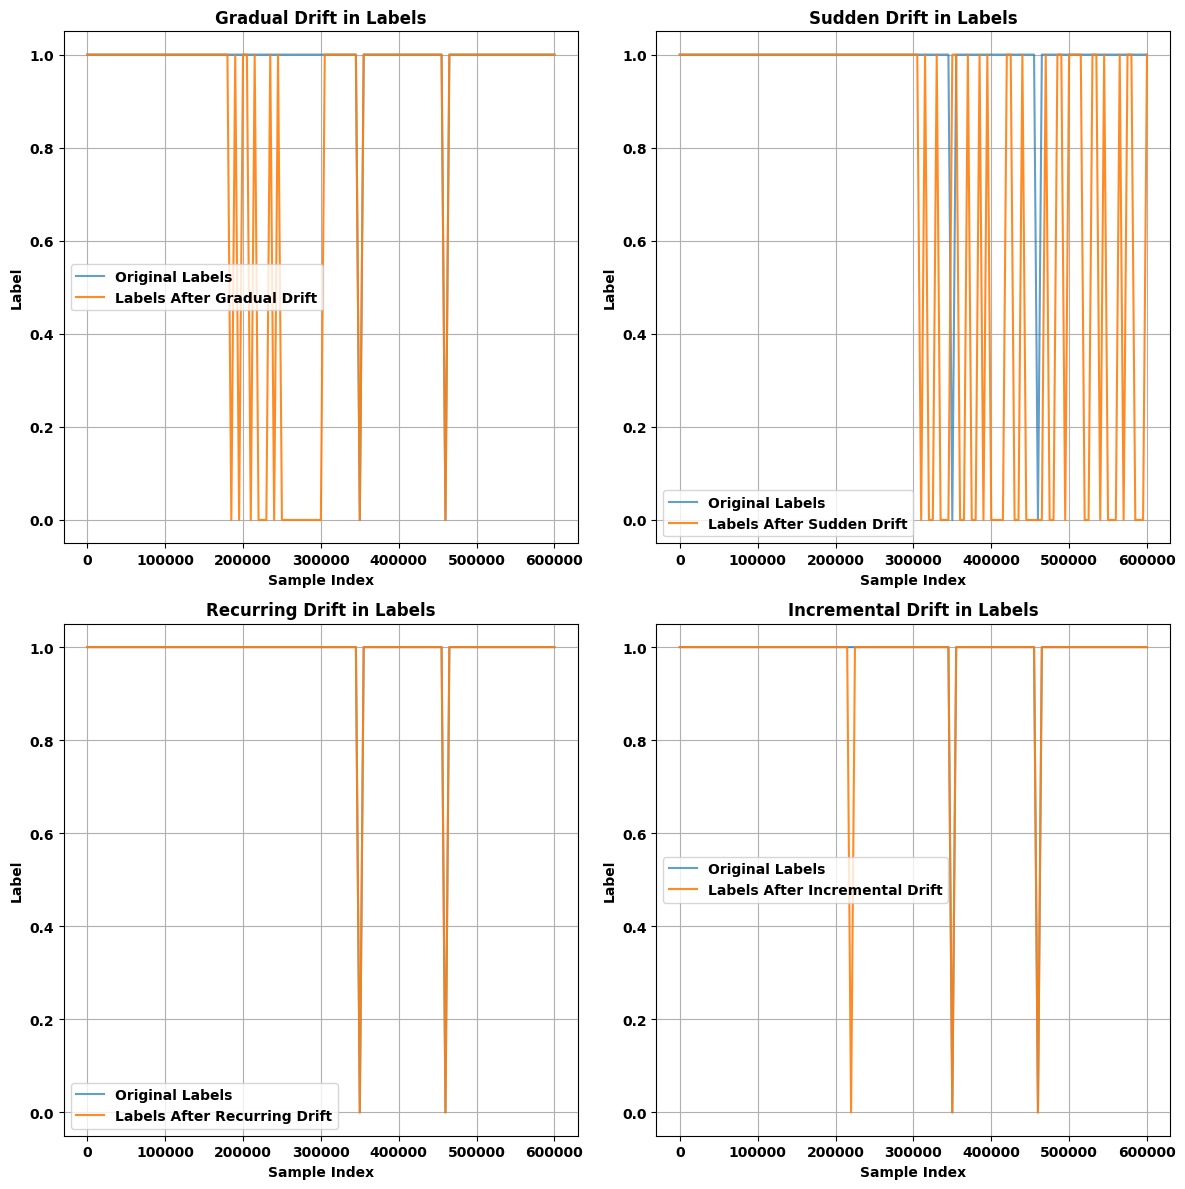

In [15]:
# Setup logging to track adaptation in real-time
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()

# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

# Define the dataset iterator
def get_dataset(X, y):
    return stream.iter_pandas(X, y)

# Introduce gradual drift in the target/label
def simulate_gradual_drift_in_labels(X, y, start_point, drift_length):
    y_drifted = y.copy()
    for i in range(start_point, start_point + drift_length):
        if i < len(y):
            y_drifted.iloc[i] = 1 - y.iloc[i] if np.random.rand() < (i - start_point) / drift_length else y.iloc[i]
    return X, y_drifted

# Introduce sudden drift in the target/label
def simulate_sudden_drift_in_labels(X, y, drift_point, drift_strength=0.5):
    y_before = y.iloc[:drift_point]
    y_after = y.iloc[drift_point:]
    y_after_drifted = y_after.apply(lambda label: 1 - label if np.random.rand() < drift_strength else label)
    y_drifted = pd.concat([y_before, y_after_drifted], axis=0)
    return X, y_drifted

# Introduce recurring drift in the target/label
def simulate_recurring_drift_in_labels(X, y, drift_points, drift_strength=0.5):
    y_drifted = y.copy()
    for drift_point in drift_points:
        for i in range(drift_point, min(drift_point + 1000, len(y))):
            y_drifted.iloc[i] = 1 - y.iloc[i] if np.random.rand() < drift_strength else y.iloc[i]
    return X, y_drifted

# Introduce incremental drift in the target/label
def simulate_incremental_drift_in_labels(X, y, start_point, end_point):
    y_drifted = y.copy()
    for i in range(start_point, end_point):
        if i < len(y):
            y_drifted.iloc[i] = 1 - y.iloc[i] if np.random.rand() < 0.1 else y.iloc[i]
    return X, y_drifted

# Define the pipeline for Adaptive SAMKNN
pipeline_adaptive = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(
        max_window_size=300,
        ltm_size=0.4,
        use_ltm=True,
        max_ltm_size_threshold=0.30
    ))
)

# Initialize the classification report for the Adaptive SAMKNN
report_adaptive = metrics.ClassificationReport()

# Function to evaluate the model
def evaluate_model(pipeline, report, model_name, X, y):
    logger.info(f"Evaluating {model_name}...")
    dataset = get_dataset(X, y)  # Reset the dataset iterator
    evaluate.progressive_val_score(
        dataset=dataset,
        model=pipeline,
        metric=report,
        print_every=50000,
        show_time=True,
        show_memory=True
    )
    logger.info(f"Finished evaluating {model_name}.")
    logger.info(report)

# 1. Gradual Drift
X_gradual, y_gradual = simulate_gradual_drift_in_labels(X, y, start_point=len(X) // 4, drift_length=len(X) // 4)
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN under Gradual Drift", X_gradual, y_gradual)

# 2. Sudden Drift
X_sudden, y_sudden = simulate_sudden_drift_in_labels(X, y, drift_point=len(X) // 2, drift_strength=0.5)
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN under Sudden Drift", X_sudden, y_sudden)

# 3. Recurring Drift
X_recurring, y_recurring = simulate_recurring_drift_in_labels(X, y, drift_points=[len(X) // 5, 3 * len(X) // 5], drift_strength=0.4)
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN under Recurring Drift", X_recurring, y_recurring)

# 4. Incremental Drift
X_incremental, y_incremental = simulate_incremental_drift_in_labels(X, y, start_point=len(X) // 3, end_point=2 * len(X) // 3)
evaluate_model(pipeline_adaptive, report_adaptive, "Adaptive SAMKNN under Incremental Drift", X_incremental, y_incremental)


# Visualization for each type of drift
sample_interval = 5000
plt.figure(figsize=(12, 12))

# Define a list of tuples containing subplot details
subplots = [
    (1, y_gradual, 'Labels After Gradual Drift', 'Gradual Drift in Labels'),
    (2, y_sudden, 'Labels After Sudden Drift', 'Sudden Drift in Labels'),
    (3, y_recurring, 'Labels After Recurring Drift', 'Recurring Drift in Labels'),
    (4, y_incremental, 'Labels After Incremental Drift', 'Incremental Drift in Labels')
]

# Iterate over each subplot to apply consistent styling
for idx, (position, y_drifted, label, title) in enumerate(subplots, start=1):
    plt.subplot(2, 2, position)
    
    # Plot Original and Drifted Labels
    plt.plot(range(0, len(y), sample_interval), y.iloc[::sample_interval], 
             label='Original Labels', alpha=0.7)
    plt.plot(range(0, len(y_drifted), sample_interval), y_drifted.iloc[::sample_interval], 
             label=label, alpha=0.9)
    
    # Set labels with bold font
    plt.xlabel('Sample Index', fontweight='bold')
    plt.ylabel('Label', fontweight='bold')
    
    # Set title with bold font
    plt.title(title, fontweight='bold')
    
    # Customize tick parameters to make them bold
    ax = plt.gca()
    for tick in ax.get_xticklabels():
        tick.set_fontweight('bold')
    for tick in ax.get_yticklabels():
        tick.set_fontweight('bold')
    
    # Set legend with bold font
    plt.legend(prop={'weight': 'bold'})
    
    # Enable grid
    plt.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Define the folder where you want to save the plot
folder_path = '/Users/promisea/SAMKNN/Plots'
file_name = 'Drift_BoT.png'

# Ensure the folder exists
os.makedirs(folder_path, exist_ok=True)

# Save the plot in the specified folder
file_path = os.path.join(folder_path, file_name)
plt.savefig(file_path)

# Display the plot
plt.show()

## Experiment 6 - Resource utilization

In [35]:
def main():
    """
    Main function to load data, define classifiers, run experiments, and evaluate resource usage.
    """
    # ================================
    # 1. Load and Preprocess the Data
    # ================================

    try:
        data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")
    except FileNotFoundError:
        print("Error: The specified CSV file was not found.")
        sys.exit(1)
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty.")
        sys.exit(1)
    except pd.errors.ParserError:
        print("Error: Error parsing the CSV file.")
        sys.exit(1)

    # Drop irrelevant columns
    irrelevant_columns = ['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label']
    for col in irrelevant_columns:
        if col not in data.columns:
            print(f"Warning: Column '{col}' not found in data. Skipping drop for this column.")
    X = data.drop(columns=[col for col in irrelevant_columns if col in data.columns])
    y = data['Label']

    # Handle missing values by imputing or dropping
    # Here, we'll drop rows with missing values for simplicity
    initial_size = X.shape[0]
    X = X.dropna()
    y = y[X.index]
    final_size = X.shape[0]
    if final_size < initial_size:
        print(f"Dropped {initial_size - final_size} rows due to missing values.")

    # Shuffle the data to ensure randomness
    X, y = shuffle(X, y, random_state=42)

    # ================================
    # 2. Define Helper Functions
    # ================================

    def get_dataset_iterator(X_data, y_data):
        """
        Creates a new dataset iterator for River's stream processing.

        Parameters:
            X_data (pd.DataFrame): Feature dataframe.
            y_data (pd.Series): Target labels.

        Returns:
            iterator: An iterator over the dataset.
        """
        return stream.iter_pandas(X_data, y_data)

    def initialize_pipelines():
        """
        Initializes and returns the pipelines for AdaptiveSAMKNN and SAMKNN classifiers.

        Returns:
            tuple: Two River pipelines for AdaptiveSAMKNN and SAMKNN classifiers.
        """
        pipeline_adaptive = compose.Pipeline(
            preprocessing.StandardScaler(),
            AdaptiveSAMKNNClassifier(
                max_window_size=300,
                ltm_size=0.4,
                use_ltm=True,
                max_ltm_size_threshold=0.30
            )
        )

        pipeline_samknn = compose.Pipeline(
            preprocessing.StandardScaler(),
            SAMKNNClassifier(
                max_window_size=300,
                ltm_size=0.4,
                use_ltm=True
            )
        )

        return pipeline_adaptive, pipeline_samknn

    def warm_up_model(pipeline, dataset, num_instances=100):
        """
        Pre-trains the model on a subset of the data to stabilize its internal state.

        Parameters:
            pipeline (river.compose.Pipeline): The River pipeline to warm up.
            dataset (iterator): The dataset iterator.
            num_instances (int): Number of instances to use for warm-up.
        """
        for _ in range(num_instances):
            try:
                X_instance, y_instance = next(dataset)
                pipeline.learn_one(X_instance, y_instance)
            except StopIteration:
                print("Warning: Dataset exhausted during warm-up.")
                break

    def track_resources(pipeline, dataset, num_instances=500):
        """
        Tracks CPU usage, memory consumption, and processing time while processing data.

        Parameters:
            pipeline (river.compose.Pipeline): The River pipeline to evaluate.
            dataset (iterator): The dataset iterator.
            num_instances (int): Number of instances to process.

        Returns:
            tuple: (average_cpu_usage_percent, peak_memory_increase_kb, elapsed_time_seconds)
        """
        process = psutil.Process()
        num_cpus = psutil.cpu_count(logical=True)

        # Measure initial memory usage
        memory_start = process.memory_info().rss / 1024  # in KB
        peak_memory_usage = memory_start

        # Initialize CPU times
        cpu_times_start = process.cpu_times()
        cpu_time_start = cpu_times_start.user + cpu_times_start.system

        # Start timer
        start_time = time.perf_counter()

        # Process instances
        processed_instances = 0
        for _ in range(num_instances):
            try:
                X_instance, y_instance = next(dataset)
            except StopIteration:
                print("Warning: Dataset exhausted during resource tracking.")
                break

            # Predict and learn
            pipeline.predict_one(X_instance)
            pipeline.learn_one(X_instance, y_instance)
            processed_instances += 1

            # Update peak memory usage
            current_memory = process.memory_info().rss / 1024  # in KB
            if current_memory > peak_memory_usage:
                peak_memory_usage = current_memory

        # End timer
        end_time = time.perf_counter()

        # Measure CPU times after processing
        cpu_times_end = process.cpu_times()
        cpu_time_end = cpu_times_end.user + cpu_times_end.system

        # Calculate CPU usage
        cpu_time_consumed = cpu_time_end - cpu_time_start  # in seconds
        elapsed_time = end_time - start_time  # in seconds
        if elapsed_time > 0 and num_cpus > 0:
            avg_cpu_usage = (cpu_time_consumed / (elapsed_time * num_cpus)) * 100
        else:
            avg_cpu_usage = 0.0

        # Calculate memory usage difference
        memory_diff = peak_memory_usage - memory_start  # in KB

        return avg_cpu_usage, memory_diff, elapsed_time

    # ================================
    # 3. Run Experiments
    # ================================

    num_rounds = 10
    results = []

    # Calculate total required instances
    required_instances_per_round = 100 + 500  # warm-up + processing
    total_required_instances = num_rounds * required_instances_per_round

    if X.shape[0] < total_required_instances:
        print(f"Warning: Dataset contains {X.shape[0]} instances, which may be insufficient for {num_rounds} rounds.")
        print("Consider using a larger dataset or reducing the number of rounds/instances per round.")

    for round_num in range(1, num_rounds + 1):
        print(f"\n=== Running Round {round_num} ===")

        # Initialize pipelines for the current round
        pipeline_adaptive, pipeline_samknn = initialize_pipelines()

        # Initialize dataset iterators
        dataset_adaptive = get_dataset_iterator(X, y)
        dataset_samknn = get_dataset_iterator(X, y)

        # Warm-up AdaptiveSAMKNN
        print("Warming up AdaptiveSAMKNNClassifier...")
        warm_up_model(pipeline_adaptive, dataset_adaptive, num_instances=100)

        # Track resources for AdaptiveSAMKNN
        print("Tracking resources for AdaptiveSAMKNNClassifier...")
        cpu_adaptive, memory_adaptive, time_adaptive = track_resources(
            pipeline_adaptive, dataset_adaptive, num_instances=500
        )

        # Warm-up SAMKNN
        print("Warming up SAMKNNClassifier...")
        warm_up_model(pipeline_samknn, dataset_samknn, num_instances=100)

        # Track resources for SAMKNN
        print("Tracking resources for SAMKNNClassifier...")
        cpu_samknn, memory_samknn, time_samknn = track_resources(
            pipeline_samknn, dataset_samknn, num_instances=500
        )

        # Store results for this round
        results.append({
            "round": round_num,
            "adaptive_cpu_usage_percent": round(cpu_adaptive, 2),
            "samknn_cpu_usage_percent": round(cpu_samknn, 2),
            "adaptive_memory_increase_kb": round(memory_adaptive, 2),
            "samknn_memory_increase_kb": round(memory_samknn, 2),
            "adaptive_processing_time_sec": round(time_adaptive, 4),
            "samknn_processing_time_sec": round(time_samknn, 4)
        })

    # ================================
    # 4. Aggregate and Display Results
    # ================================

    df_results = pd.DataFrame(results)
    print("\n=== Detailed Results per Round ===")
    print(df_results.to_string(index=False))

    # Calculate mean and standard deviation for each metric
    summary = {
        "Metric": [
            "Adaptive SAMKNN CPU Usage (%)",
            "SAMKNN CPU Usage (%)",
            "Adaptive SAMKNN Memory Increase (KB)",
            "SAMKNN Memory Increase (KB)",
            "Adaptive SAMKNN Processing Time (sec)",
            "SAMKNN Processing Time (sec)"
        ],
        "Mean": [
            df_results['adaptive_cpu_usage_percent'].mean(),
            df_results['samknn_cpu_usage_percent'].mean(),
            df_results['adaptive_memory_increase_kb'].mean(),
            df_results['samknn_memory_increase_kb'].mean(),
            df_results['adaptive_processing_time_sec'].mean(),
            df_results['samknn_processing_time_sec'].mean()
        ],
        "Standard Deviation": [
            df_results['adaptive_cpu_usage_percent'].std(),
            df_results['samknn_cpu_usage_percent'].std(),
            df_results['adaptive_memory_increase_kb'].std(),
            df_results['samknn_memory_increase_kb'].std(),
            df_results['adaptive_processing_time_sec'].std(),
            df_results['samknn_processing_time_sec'].std()
        ]
    }

    df_summary = pd.DataFrame(summary)
    print("\n=== Summary of Results ===")
    print(df_summary.to_string(index=False, float_format="{:.2f}".format))

    # Optionally, save results to a CSV file
    # df_results.to_csv("experiment_results.csv", index=False)
    # df_summary.to_csv("experiment_summary.csv", index=False)

if __name__ == "__main__":
    main()


=== Running Round 1 ===
Warming up AdaptiveSAMKNNClassifier...
Tracking resources for AdaptiveSAMKNNClassifier...
Warming up SAMKNNClassifier...
Tracking resources for SAMKNNClassifier...

=== Running Round 2 ===
Warming up AdaptiveSAMKNNClassifier...
Tracking resources for AdaptiveSAMKNNClassifier...
Warming up SAMKNNClassifier...
Tracking resources for SAMKNNClassifier...

=== Running Round 3 ===
Warming up AdaptiveSAMKNNClassifier...
Tracking resources for AdaptiveSAMKNNClassifier...
Warming up SAMKNNClassifier...
Tracking resources for SAMKNNClassifier...

=== Running Round 4 ===
Warming up AdaptiveSAMKNNClassifier...
Tracking resources for AdaptiveSAMKNNClassifier...
Warming up SAMKNNClassifier...
Tracking resources for SAMKNNClassifier...

=== Running Round 5 ===
Warming up AdaptiveSAMKNNClassifier...
Tracking resources for AdaptiveSAMKNNClassifier...
Warming up SAMKNNClassifier...
Tracking resources for SAMKNNClassifier...

=== Running Round 6 ===
Warming up AdaptiveSAMKNNClass

## Experiment 7 - Ablation Test

### Adaptive SAMKNN without LTM

In [17]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=False, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]            Precision   Recall   F1       Support  
                                                  
       0      75.00%   24.45%   36.88%       454  
       1      98.27%   99.81%   99.04%     19545  
                                                  
   Macro      86.64%   62.13%   67.96%            
   Micro      98.10%   98.10%   98.10%            
Weighted      97.74%   98.10%   97.62%            

                 98.10% accuracy                   – 00:00:03 – 72.34 KB
[40,000]            Precision   Recall   F1       Support  
                                                  
       0      70.86%   22.64%   34.32%       870  
       1      98.31%   99.79%   99.04%     39129  
                                                  
   Macro      84.58%   61.22%   66.68%            
   Micro      98.11%   98.11%   98.11%            
Weighted      97.71%   98.11%   97.64%            

                 98.11% accuracy                   – 00:00:07 – 73.91 KB
[60,000]          

           Precision   Recall   F1       Support  
                                                  
       0      72.21%   28.09%   40.45%     13859  
       1      98.32%   99.74%   99.03%    586240  
                                                  
   Macro      85.27%   63.92%   69.74%            
   Micro      98.09%   98.09%   98.09%            
Weighted      97.72%   98.09%   97.68%            

                 98.09% accuracy                  

In [18]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Attack']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', AdaptiveSAMKNNClassifier(max_window_size=300, ltm_size=0.4, use_ltm=False, max_ltm_size_threshold=0.30))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      72.78%   25.33%   37.58%       454  
          DDoS      37.14%   39.98%   38.51%      1896  
           DoS      36.77%   39.83%   38.24%      1863  
Reconnaissance      92.69%   92.96%   92.83%     15718  
         Theft      38.89%   10.29%   16.28%        68  
                                                        
         Macro      55.65%   41.68%   44.69%            
         Micro      81.17%   81.17%   81.17%            
      Weighted      81.58%   81.17%   81.08%            

                    81.17% accuracy                      – 00:00:03 – 73.92 KB
[40,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      68.54%   23.79%   35.32%       870  
          DDoS      36.80%   39.65%   38.17%      3818  
           DoS      36.90%   39.39%   38.11%   

                 Precision   Recall   F1       Support  
                                                        
        Benign      70.33%   29.20%   41.27%     13859  
          DDoS      36.90%   39.73%   38.26%     56844  
           DoS      36.97%   39.60%   38.24%     56833  
Reconnaissance      92.82%   93.08%   92.95%    470654  
         Theft      35.92%    5.34%    9.30%      1909  
                                                        
         Macro      54.59%   41.39%   44.00%            
         Micro      81.21%   81.21%   81.21%            
      Weighted      81.53%   81.21%   81.13%            

                    81.21% accuracy                     

### SAMKNN with LTM

In [19]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=True, weighting='distance'))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]            Precision   Recall   F1       Support  
                                                  
       0      69.09%   16.74%   26.95%       454  
       1      98.10%   99.83%   98.96%     19545  
                                                  
   Macro      83.60%   58.28%   62.95%            
   Micro      97.94%   97.94%   97.94%            
Weighted      97.44%   97.94%   97.32%            

                 97.94% accuracy                   – 00:00:06 – 2.55 MB
[40,000]            Precision   Recall   F1       Support  
                                                  
       0      62.76%   14.14%   23.08%       870  
       1      98.12%   99.81%   98.96%     39129  
                                                  
   Macro      80.44%   56.98%   61.02%            
   Micro      97.95%   97.95%   97.95%            
Weighted      97.35%   97.95%   97.31%            

                 97.95% accuracy                   – 00:00:12 – 3.67 MB
[60,000]            

           Precision   Recall   F1       Support  
                                                  
       0      69.90%   19.84%   30.90%     13859  
       1      98.14%   99.80%   98.96%    586240  
                                                  
   Macro      84.02%   59.82%   64.93%            
   Micro      97.95%   97.95%   97.95%            
Weighted      97.48%   97.95%   97.39%            

                 97.95% accuracy                  

In [20]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Attack']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=True, weighting='distance'))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      66.36%   16.08%   25.89%       454  
          DDoS      37.27%   37.08%   37.18%      1896  
           DoS      37.22%   34.78%   35.96%      1863  
Reconnaissance      90.76%   93.83%   92.27%     15718  
         Theft      46.15%    8.82%   14.81%        68  
                                                        
         Macro      55.55%   38.12%   41.22%            
         Micro      80.89%   80.89%   80.89%            
      Weighted      80.00%   80.89%   80.03%            

                    80.89% accuracy                      – 00:00:06 – 2.54 MB
[40,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      64.77%   14.37%   23.52%       870  
          DDoS      36.58%   35.86%   36.22%      3818  
           DoS      36.78%   34.78%   35.75%    

                 Precision   Recall   F1       Support  
                                                        
        Benign      70.32%   19.99%   31.13%     13859  
          DDoS      36.59%   35.42%   36.00%     56844  
           DoS      36.45%   35.49%   35.96%     56833  
Reconnaissance      90.81%   93.69%   92.23%    470654  
         Theft      36.54%    3.98%    7.18%      1909  
                                                        
         Macro      54.14%   37.71%   40.50%            
         Micro      80.67%   80.67%   80.67%            
      Weighted      79.88%   80.67%   79.89%            

                    80.67% accuracy                     

### SAMKNN without LTM

In [21]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, n_neighbors=5, stm_size_option='maxACCApprox', use_ltm=False, weighting='distance'))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]            Precision   Recall   F1       Support  
                                                  
       0      75.00%   24.45%   36.88%       454  
       1      98.27%   99.81%   99.04%     19545  
                                                  
   Macro      86.64%   62.13%   67.96%            
   Micro      98.10%   98.10%   98.10%            
Weighted      97.74%   98.10%   97.62%            

                 98.10% accuracy                   – 00:00:02 – 2.46 MB
[40,000]            Precision   Recall   F1       Support  
                                                  
       0      70.86%   22.64%   34.32%       870  
       1      98.31%   99.79%   99.04%     39129  
                                                  
   Macro      84.58%   61.22%   66.68%            
   Micro      98.11%   98.11%   98.11%            
Weighted      97.71%   98.11%   97.64%            

                 98.11% accuracy                   – 00:00:05 – 3.49 MB
[60,000]            

           Precision   Recall   F1       Support  
                                                  
       0      72.21%   28.09%   40.45%     13859  
       1      98.32%   99.74%   99.03%    586240  
                                                  
   Macro      85.27%   63.92%   69.74%            
   Micro      98.09%   98.09%   98.09%            
Weighted      97.72%   98.09%   97.68%            

                 98.09% accuracy                  

In [22]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Attack']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', SAMKNNClassifier(ltm_size=0.4, max_window_size=300, min_stm_size=30, use_ltm=False, weighting='distance'))
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      72.78%   25.33%   37.58%       454  
          DDoS      37.14%   39.98%   38.51%      1896  
           DoS      36.77%   39.83%   38.24%      1863  
Reconnaissance      92.69%   92.96%   92.83%     15718  
         Theft      38.89%   10.29%   16.28%        68  
                                                        
         Macro      55.65%   41.68%   44.69%            
         Micro      81.17%   81.17%   81.17%            
      Weighted      81.58%   81.17%   81.08%            

                    81.17% accuracy                      – 00:00:02 – 2.46 MB
[40,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      68.54%   23.79%   35.32%       870  
          DDoS      36.80%   39.65%   38.17%      3818  
           DoS      36.90%   39.39%   38.11%    

                 Precision   Recall   F1       Support  
                                                        
        Benign      70.33%   29.20%   41.27%     13859  
          DDoS      36.90%   39.73%   38.26%     56844  
           DoS      36.97%   39.60%   38.24%     56833  
Reconnaissance      92.82%   93.08%   92.95%    470654  
         Theft      35.92%    5.34%    9.30%      1909  
                                                        
         Macro      54.59%   41.39%   44.00%            
         Micro      81.21%   81.21%   81.21%            
      Weighted      81.53%   81.21%   81.13%            

                    81.21% accuracy                     

### KNN

In [23]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Label']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', neighbors.KNNClassifier())
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]            Precision   Recall   F1       Support  
                                                  
       0      57.14%   36.12%   44.26%       454  
       1      98.53%   99.37%   98.95%     19545  
                                                  
   Macro      77.84%   67.75%   71.61%            
   Micro      97.93%   97.93%   97.93%            
Weighted      97.59%   97.93%   97.71%            

                 97.93% accuracy                   – 00:00:30 – 4.96 MB
[40,000]            Precision   Recall   F1       Support  
                                                  
       0      55.38%   36.09%   43.70%       870  
       1      98.59%   99.35%   98.97%     39129  
                                                  
   Macro      76.98%   67.72%   71.34%            
   Micro      97.98%   97.98%   97.98%            
Weighted      97.65%   97.98%   97.77%            

                 97.98% accuracy                   – 00:00:59 – 4.93 MB
[60,000]            

           Precision   Recall   F1       Support  
                                                  
       0      51.32%   37.66%   43.44%     13859  
       1      98.54%   99.16%   98.84%    586240  
                                                  
   Macro      74.93%   68.41%   71.14%            
   Micro      97.74%   97.74%   97.74%            
Weighted      97.45%   97.74%   97.57%            

                 97.74% accuracy                  

In [24]:
# Load and preprocess the data
data = pd.read_csv("/Users/promisea/SAMKNN/NF-BoT-IoT/NF-BoT-IoT.csv")

# Drop irrelevant columns
X = data.drop(['IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'Attack', 'Label'], axis=1)
y = data['Attack']

# Shuffle the data to ensure randomness
X, y = shuffle(X, y, random_state=42)

dataset = stream.iter_pandas(X, y)

model = compose.Pipeline(
    preprocessing.StandardScaler(),
    ('classifier', neighbors.KNNClassifier())
)

#Passing the evalaution metrics into a variable
report = metrics.ClassificationReport()

# Evaluate classifiers
evaluate.progressive_val_score(dataset, model, report, print_every=20000, show_time=True, show_memory=True)

[20,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      51.05%   37.44%   43.20%       454  
          DDoS      32.96%   35.92%   34.38%      1896  
           DoS      33.02%   34.30%   33.65%      1863  
Reconnaissance      91.96%   91.42%   91.69%     15718  
         Theft      55.26%   30.88%   39.62%        68  
                                                        
         Macro      52.85%   45.99%   48.51%            
         Micro      79.41%   79.41%   79.41%            
      Weighted      79.82%   79.41%   79.57%            

                    79.41% accuracy                      – 00:00:32 – 4.93 MB
[40,000]                  Precision   Recall   F1       Support  
                                                        
        Benign      48.98%   35.75%   41.33%       870  
          DDoS      33.89%   36.41%   35.10%      3818  
           DoS      33.68%   34.84%   34.25%    

                 Precision   Recall   F1       Support  
                                                        
        Benign      48.82%   38.15%   42.83%     13859  
          DDoS      35.33%   37.00%   36.15%     56844  
           DoS      35.00%   36.62%   35.79%     56833  
Reconnaissance      91.83%   91.58%   91.70%    470654  
         Theft      46.47%   22.05%   29.91%      1909  
                                                        
         Macro      51.49%   45.08%   47.28%            
         Micro      79.75%   79.75%   79.75%            
      Weighted      79.96%   79.75%   79.82%            

                    79.75% accuracy                     